# Histplot: Conhecendo o formato de uma distribuição de valores

Nessa aula vamos continuar expandindo o nosso vocabulário de vizualizações gráficas com um novo modelo de gráfico: o histograma. Vamos começar apresentando este gráfico, muito utilizado nas ciências exatas para compreender como uma variável numérica se comporta. Vamos, em seguida, começar a aprender a mexer nos eixos do gráfico e, ao final da aula, vamos também conferir uma outra ferramenta que podemos utilizar para visualizar o formato de uma distribuição: a curva de estimativa de densidade.

## 1. O que é um histograma?

Um histograma é uma ferramenta gráfica amplamente utilizada em análise de dados e estatística para representar a distribuição de um conjunto de dados. Ele é composto por barras verticais, cada uma representando a frequência de obervações em uma faixa de valores (ou intervalo).

Imagine que você tem um grupo de dados, como as alturas de uma turma de estudantes. Um histograma pode ser usado para visualizar quantos alunos estão em cada faixa etária, por exemplo, quantos têm entre 1,50 metros e 1,60 metros, entre 1,60 e 1,70, e assim por diante. Cada uma dessas faixas de idade seria representada por uma barra no histograma, e a altura da barra mostraria quantos alunos estão dentro daquela faixa específica.

O histograma é particularmente útil porque permite ver rapidamente a forma da distribuição dos dados, identificando padrões como concentrações de valores (onde as barras são mais altas) ou a presença de outliers (valores fora do padrão). Por permitir a visualização rápida e eficaz das tendências de uma variável numérica, histogramas são ferramentas poderosas usadas frequentemente em diversas áreas da pesquisa científica, não apenas nas ciências exatas e naturais, mas também em ciências sociais e políticas, em economia, entre outras.

## 2. Utilizando a função histplot para criar histogramas

A seguir, vamos aprender a criar histogramas utilizando a função `histplot` da biblioteca `seaborn`. No entanto, antes de começar a criar nossas visualizações, precisamos executar algumas linhas de código preliminares, já vistas nos capítulos anteriores, além de apresentar uma nova base de dados, que utilizaremos nesta aula.

### 2.1. Passos preliminares

Antes de iniciar qualquer tarefa de análise de dados e criação de gráficos, precisamos carregar as nossas já conhecidas bibliotecas.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vamos utilizar dados relacionados ao Índice de Desenvolvimento Humano – IDH de diversos países, disponibilizados pelo [Programa da Onu para o Desenvolvimento](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI). Os dados já foram tratados para que tenhamos apenas uma seleção de variáveis de nosso interesse, em português e em um formato **tidy**.

Criamos duas versões dessa mesma base de dados para as nossas aulas. Uma delas, a versão completa, inclui dados de 195 países entre os anos de 1990 e 2022, totalizando 6435 linhas. A segunda versão inclui apenas os dados desses países para 2022, totalizando assim 195 linhas. Na aula de hoje, vamos utilizar apenas essa segunda versão, com dados apenas de 2022, que podemos carregar utilizando a seguinte linha de código:

In [91]:
idh_2022 = pd.read_csv("https://bit.ly/idh_tidy_2022")
idh_2022

,sigla,pais,grupo_idh,regiao,ranking_idh,idh,idh_ev,idh_ee,idh_me,idh_rpc,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
0,AFG,Afeganistão,Baixo,Ásia do Sul,182.0,0.462,62.879,10.705385,2.514790,1335.205733,...,59.766,13.228449,3.912740,2256.217507,27.215190,72.784810,23.33,77.09,0.306318,41.128771
1,ALB,Albânia,Alto,Europa e Ásia Central,74.0,0.789,76.833,14.487470,10.121144,15293.326510,...,74.502,14.292200,10.433855,17398.003690,35.714286,64.285714,56.08,69.91,1.717758,2.842321
2,DZA,Argélia,Alto,Países Árabes,93.0,0.745,77.129,15.487880,6.987444,10978.405710,...,75.853,14.743880,7.481537,17858.790780,7.005254,92.994746,17.57,65.53,4.079540,44.903225
3,AND,Andorra,Muito Alto,NaN,35.0,0.884,83.552,12.783780,11.613440,54233.449480,...,81.430,12.810630,11.704380,NaN,46.428571,53.571429,NaN,NaN,4.593593,0.079824
4,AGO,Angola,Mediano,África Sub-sahariana,150.0,0.591,61.929,12.167600,5.844292,5327.788251,...,59.351,12.909900,7.187960,5973.845631,33.636364,66.363636,74.73,78.16,0.507359,35.588987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,VEN,Venezuela,Mediano,América Latina e Caribe,119.0,0.699,71.105,13.502064,9.628154,6184.136000,...,66.875,12.386829,9.469866,8125.532772,22.155689,77.844311,45.21,70.57,2.539494,28.301696
191,VNM,Vietnã,Alto,Ásia do Leste e Pacífico,107.0,0.726,74.580,13.052947,8.455349,10813.982730,...,69.927,12.792697,8.789584,12042.413790,30.260521,69.739479,68.54,77.84,3.617121,98.186856
192,YEM,Iêmen,Baixo,Países Árabes,186.0,0.424,63.720,7.935313,2.776826,1105.763435,...,60.493,8.919806,3.587976,2041.915582,0.294118,99.705882,5.84,64.69,0.351347,33.696614
193,ZMB,Zâmbia,Mediano,África Sub-sahariana,153.0,0.569,61.803,11.017970,7.284893,3157.358620,...,59.058,10.983883,8.326238,3800.490760,15.060241,84.939759,54.16,66.36,0.444880,20.017675


A base `idh_2022` possui 27 colunas, com informações gerais do país (como a sigla, o nome, a região em que se encontra), bem como os resultados de diversas medidas quantitativas relevantes de seu desenvolvimento. Esses indicadores de desenvolvimento podem ser divididos em três grupos: (i) IDH e seus componentes; (ii) GDI e seus componentes; (iii) outros indicadores extras.

A lista a seguir indica qual variável é medida em cada coluna da base:

 - `sigla`: A sigla do nome do país (formato iso3).
 - `pais`: O nome do país, em português.
 - `grupo_idh`: A qual grupo da divisão do IDH feito pelas Nações Unidas pertence o país. Há quatro grupos: `"Baixo"`, `"Mediano"`, `"Alto"`, `"Muito Alto"`.
 - `regiao`: Região geográfica a que pertence o país, dentre as 6 categorias de classificação utilizadas pelas Nações Unidas (nem todos os países se enquadram em uma dessas 6 categorias).
 - `ranking_idh`: Posição do país no ranking do IDH de 2022.
 - `idh`: Índice de Desenvolvimento Humano - IDH.
 - `idh_ev`: Expectativa de vida (Anos).
 - `idh_ee`: Expectativa de escolaridade (Anos).
 - `idh_me`: Média de escolaridade (Anos).
 - `idh_rpc`: Renda Per Capita (PPC$ em 2017).
 - `gdi`: Índice de Desenvolvimento de Gênero - IDG.
 - `gdi_idh_f`: Índice de Desenvolvimento Humano Feminino.
 - `gdi_idh_m`: Índice de Desenvolvimento Humano Masculino.
 - `gdi_ev_f`: Expectativa de vida das mulheres (Anos).
 - `gdi_ev_m`: Expectativa de vida dos homens (Anos).
 - `gdi_ee_f`: Expectativa de escolaridade das mulheres (Anos).
 - `gdi_ee_m`: Expectativa de escolaridade dos homens (Anos).
 - `gdi_me_f`: Média de escolaridade das mulheres (Anos).
 - `gdi_me_m`: Média de escolaridade dos homens (Anos).
 - `gdi_rpc_f`: Renda Per Capita das mulheres (PPC$ em 2017).
 - `gdi_rpc_m`: Renda Per Capita dos homens (PPC$ em 2017).
 - `extra_ap_f`: Assentos do parlamento ocupados por mulheres (%).
 - `extra_ap_m`: Assentos do parlamento ocupados por homens (%).
 - `extra_ft_f`: Mulheres com +15 anos na força de trabalho (%).
 - `extra_ft_m`: Homens com +15 anos na força de trabalho (%).
 - `extra_co2`: Emissão per capita de dióxido de carbono da produção (Toneladas).
 - `extra_pop`: População Total.

Agora que já carregamos nossas bibliotecas e já conhecemos os dados com os quais teremos que trabalhar, vamos à criação do nosso primeiro histograma.

### 2.2. Histplot

Podemos criar um histograma utilizando a função `histplot()` da biblioteca seaborn. Como histogramas representam contagens de frequência de apenas uma variável numérica, precisamos apenas especificar qual variável queremos analisar.

Vamos começar nossa análise com as 4 componentes que formam o IDH: (i) expectativa de vida, (ii) expectativa de escolaridade, (iii) média de anos de escolaridade e (iv) renda per capita. O código a seguir cria um histograma da primeira dessas componentes, a expectativa de vida total da população (coluna `"idh_ev"` da nossa base).

<Axes: xlabel='idh_ev', ylabel='Count'>

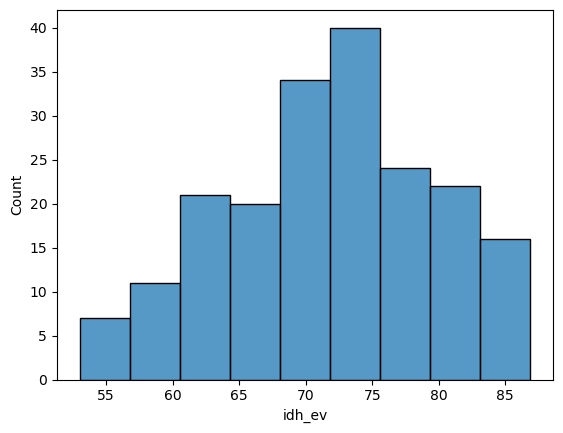

In [93]:
sns.histplot(x="idh_ev", data=idh_2022)

O gráfico nos permite observar que a medida de expectativa de vida da população segue uma distribuição normal entre os países. Em 2022, houve poucos países com expectativa de vida muito alta (acima de 80 anos) ou muito baixa (abaixo de 60 anos). A maior parte dos países estavam concentrados em faixas de expectativa de vida que vão de pouco menos de 65 anos até pouco menos de 80 anos.

Agora vamos criar um histograma para analisar a segunda componente do IDH: a expectativa de escolaridade (coluna `"idh_ee"` da nossa base). Apenas para lembrar nossa última aula, vamos selecionar uma cor diferente para o nosso histograma, utilizando o argumento `color` (uma lista com o nome de cores disponíveis pode ser encontrada [aqui](https://matplotlib.org/stable/gallery/color/named_colors.html)).

<Axes: xlabel='idh_ee', ylabel='Count'>

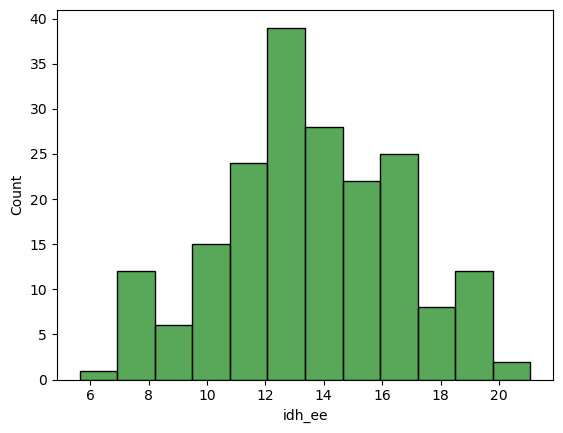

In [101]:
sns.histplot(x="idh_ee", color="forestgreen", data=idh_2022)

Novamente verificamos uma distribuição que segue o formato da curva normal. A maioria dos países apresentaram, em 2022, uma expectativa de escolaridade superior a 10 anos e inferior a 18 anos.

#### 2.2.1. Alterando os intervalos do histograma

No entanto, uma outra característica desse gráfico pode chamar nossa atenção: as barras parecem estar mais finas do que as barras do gráfico anterior. Por que isso aconteceu?

Como vimos, ao criar um histograma estabelecemos um conjunto de faixas de valores (intervalos) e medimos a frequência de ocorrência da nossa variável em cada intervalo. Cada barra representa o número de casos ou observações que se encontram naquele intervalo de valores. Podemos pensar nesse procedimento como o ato de colocar as observações dentro de "cestas", de acordo com o intervalo de valor no qual nossa observação se insere. Mas o que não dissemos antes é: como são definidos esses intervalos de valores que queremos analisar?

Na verdade, essa não é uma pergunta muito simples. A função `histplot` tenta estimar, a partir de caraterísticas da própria variável numérica que estamos analisando, quais seriam os intervalos mais apropriados. No entanto, é  importante destacar que essa quantidade de intervalos (ou "cestas") pode interferir em nossa visualização dos dados. Se tivermos um bom motivo para achar que os intervalos selecionados pela função `histplot` não estão adequados, podemos interferir e mudar esses intervalos.

Uma forma de fazer isso é por meio do argumento `bins`. Esse argumento pode ser utilizado para determinar o número de "cestas" (intervalos) que queremos utilizar. O código abaixo repete o nosso último gráfico (distribuição da expectativa de escolaridade), alterando apenas o número de "cestas" utilizadas em nosso histograma. Tínhamos anteriormente 12 cestas, agora vamos utilizar apenas 8 cestas.

<Axes: xlabel='idh_ee', ylabel='Count'>

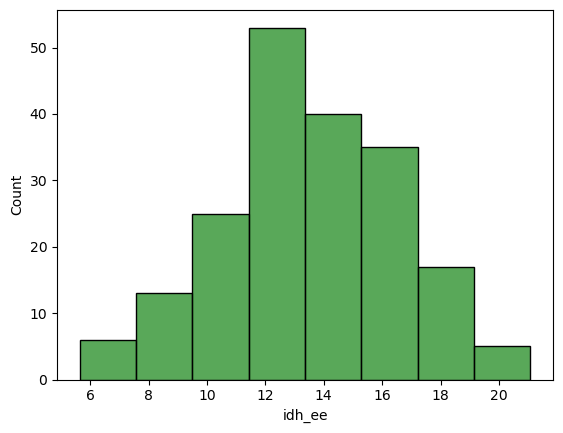

In [102]:
sns.histplot(x="idh_ee", color="forestgreen", bins=8, data=idh_2022)

Uma segunda forma de alterar os intervalos de nosso histograma é estabelecendo um valor para a "largura da cesta", ou seja, para o tamanho de cada intervalo utilizado. Fazemos isso por meio do argumento `binwidth` da função `histplot`. 

Vamos, novamente, repetir o histograma da distribuição da expectativa de escolaridade, mas agora vamos alterar a construção dos intervalos por meio do argumento `binwidth`. Vamos estabelecer que cada intervalo do nosso histograma terá uma largura de 3 anos.

<Axes: xlabel='idh_ee', ylabel='Count'>

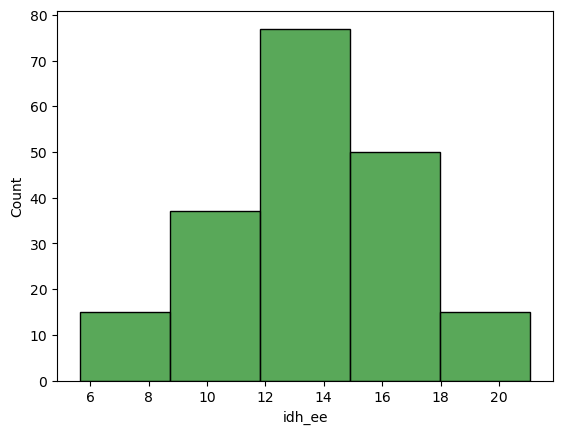

In [103]:
sns.histplot(x="idh_ee", color="forestgreen", binwidth=3, data=idh_2022)

### Formatos das distribuições

Vamos agora seguir com a nossa análise das componentes do IDH. Já analisamos a expectativa de vida e a expectativa de escolaridade dos países em 2022, e vimos que ambas as métricas apresentaram um formato de distribuição normal, com valores concentrados nas faixas intermediárias e um número menor de casos com valores muito baixos ou muito altos.

A próxima componente do IDH é a média de anos de escolaridade (coluna `"idh_me"` de nossa base). O código a seguir cria um histograma dessa variável, introduzindo uma nova cor para as barras do gráfico.

<Axes: xlabel='idh_me', ylabel='Count'>

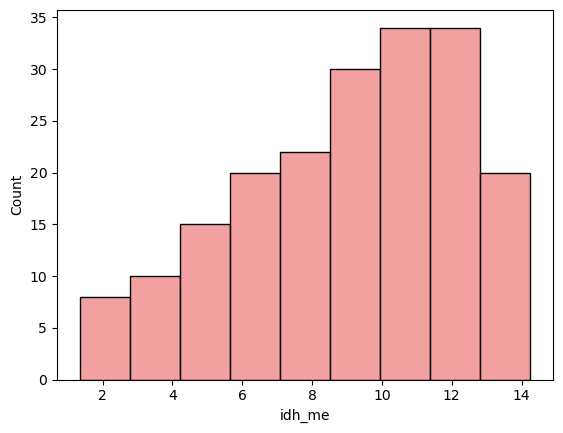

In [99]:
sns.histplot(x="idh_me", color="lightcoral", data=idh_2022)

Pela primeira vez observamos uma distribuição de valores que não segue o formato da curva normal. A distribuição da média de anos de escolaridade dos países em 2022 segue um formato que chamamos de "distorcido à esquerda". Um histograma é distorcido à esquerda quando a frequência dos dados está concentrada nos valores mais altos, formando uma cauda à esquerda.

Mas, por que pode ser importante entender esse formato da distribuição? Há inúmeras razões, mas uma das principais diz respeito a como devemos interpretar a média dessa variável. Quando a distribuição é distorcida à esquerda, a média da variável numérica será inferior ao valor da variável observado na maioria dos casos. Ou seja, em nosso caso, se tirarmos uma média da componente do IDH que estamos analisando, essa média será inferior ao valor da componente na maior parte dos países que estamos analisando. Isso acontece porque alguns poucos países com valores muito baixos estão "puxando" a média para baixo.

Vamos, agora, criar o histograma da última componente do IDH, a renda per capita dos países. Essa variável está situada na coluna `"idh_rpc"` de nossa base e, como nos casos anteriores, será representada com uma cor própria no código a seguir.

<Axes: xlabel='idh_rpc', ylabel='Count'>

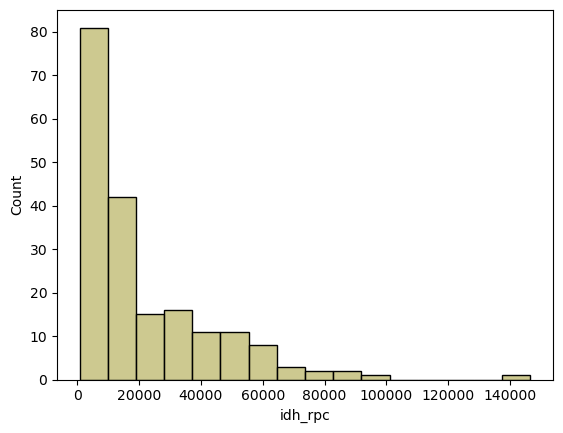

In [105]:
sns.histplot(x="idh_rpc", color="darkkhaki", data=idh_2022)